In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load RF model

In [2]:
RF_score = 'gini'
yr_start = 2019
yr_end = 2022
mask = 'SIMPLE_MASK'
stand_str = 'STANDARDIZED'
RI_thresh = 30
weights = 'default'
N_samples_RF = 10
scoring = 'f1_weighted'
RF_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/ALL_2019-2021_ONLY'
#RF_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/'
RF_ext = '_{RF_score}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{scoring}.csv'.format(RF_score='Random Forest',yr_start=yr_start,yr_end=yr_end,mask=mask,
            stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)


In [42]:
RF_dir+'PREDICTED_Y_vals'+RF_ext
fig_format = 'pdf'

##### Load LR Model

In [43]:
LR_models = ['lbfgs']#,'saga']
valid_yr_start = 2019
valid_yr_end = 2022
#N_samples_LR = 15
LR_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/ALL_2019-2021_ONLY'
#LR_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/'
LR_ext1 = '_{model}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{scoring}.csv'.format(model=LR_models[0],yr_start=valid_yr_start,
                                            yr_end=valid_yr_end,mask=mask,
                                  stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)
#LR_ext2 = '_{model}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
#'{weights}_wts_{scoring}.csv'.format(model=LR_models[1],yr_start=valid_yr_start,yr_end=valid_yr_end,mask=mask,
 #                                 stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)

In [44]:
y_pred_LR1 = pd.read_csv(LR_dir+'PREDICTED_Y_vals'+LR_ext1)
y_pred_LR1 = y_pred_LR1.rename(columns={'Y test':'Y true'})
#y_pred_LR2 = pd.read_csv(LR_dir+'PREDICTED_Y_vals'+LR_ext2)
y_pred_RF = pd.read_csv(RF_dir+'PREDICTED_Y_vals'+RF_ext)
y_pred_RF = y_pred_RF.rename(columns={'Y test':'Y true'})
y_pred_res = pd.concat([y_pred_RF,y_pred_LR1])#,y_pred_LR2])

In [45]:
#y_pred_res['Predicted Basin'] = y_pred_res['Predicted Basin'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
#y_pred_res['BASIN'] = y_pred_res['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)


In [46]:
y_pred_res['DATE_full'].sort_values()

1006    2019-01-01 00:00:00
412     2019-01-01 00:00:00
784     2019-01-01 00:00:00
377     2019-01-01 00:00:00
1441    2019-01-01 06:00:00
               ...         
254     2021-11-05 18:00:00
1449    2021-11-06 00:00:00
357     2021-11-06 00:00:00
1084    2021-11-06 00:00:00
277     2021-11-06 00:00:00
Name: DATE_full, Length: 2940, dtype: object

##### Load SHIPS-RII

In [47]:
yr_sel = [2020,2021]
best_track = pd.DataFrame()
e_deck = pd.DataFrame()
for iyr in yr_sel:
    ibest_track = pd.read_csv('DATA/best_tracks_{year_sel}.csv'.format(year_sel=iyr))
    ie_deck = pd.read_csv('DATA/etracks_RI_{year_sel}.csv'.format(year_sel=iyr))
    #if iyr == 2021:
        #ie_deck = ie_deck.rename(columns={'ProbFormat':})
    #
    e_deck = e_deck.append(ie_deck)
    best_track = best_track.append(ibest_track)
####
best_track = best_track.drop(columns={'Unnamed: 0','TECHNUM','DEPTH','SEASCODE','WINDCODE','SEAS','SEAS1','SEAS2',
                                     'P Outer','R Outer','SUBREGION','MAXSEAS','INITIALS','SEAS3','SEAS4'})
best_track['DATE'] = pd.to_datetime(best_track['DATE']).dt.date#.set_index(['BASIN','DATE','NAME'])#.head(20)
#
best_track['BASIN'] = best_track['BASIN'].replace({'AL':'ATLANTIC','EP':'EAST_PACIFIC'})
#
e_deck = e_deck.drop(columns={'Initials','Unnamed: 0'})
best_track = best_track[best_track['RAD']==34]


In [48]:
e_deck['BASIN'] = e_deck['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
best_track['BASIN'] = best_track['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

#### Load 2019

In [49]:
yr_sel = 2019
load_edeck_2019 = 'DATA/SHIPS_RII_rapid_intense_probs_{yr}.csv'.format(yr=2019)
edeck_2019 = pd.read_csv(load_edeck_2019)
##
for iyr in [2019,2020,2021]:
    ibest_track = pd.read_csv('DATA/best_tracks_{year_sel}.csv'.format(year_sel=iyr))
    #ie_deck = pd.read_csv('DATA/etracks_RI_{year_sel}.csv'.format(year_sel=iyr))
    #
    #e_deck = e_deck.append(ie_deck)
    best_track = best_track.append(ibest_track)

In [50]:
#e_deck['CYCLONE NO'].unique()
edeck_2019['BASIN'] = edeck_2019['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
best_track['BASIN'] = best_track['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

In [51]:
e_deck['ATCF BASIN'] = e_deck['BASIN']
e_deck['ATCF BASIN'] = e_deck['ATCF BASIN'].replace('ATLANTIC','AL',regex=True)
e_deck['ATCF BASIN'] = e_deck['ATCF BASIN'].replace('EAST_PACIFIC','EP',regex=True)
e_deck['ATCF BASIN'] = e_deck['ATCF BASIN'].replace('CENTRAL_PACIFIC','CP',regex=True)
#
e_deck['ATCF Year'] = pd.to_datetime(e_deck['DATE']).dt.year


In [52]:
e_deck['ATCF ID'] = e_deck['ATCF BASIN'] + e_deck['CYCLONE NO'].astype(str) + e_deck['ATCF Year'].astype(str)

In [53]:
e_deck['ATCF BASIN'] + e_deck['CYCLONE NO'].astype(str)

0         ALC7
1         ALC7
2         ALC7
3         ALC7
4         ALC7
          ... 
102823    AL13
102824    AL13
102825    AL13
102826    AL13
102827    AL13
Length: 247736, dtype: object

In [54]:
e_deck.columns
e_deck = e_deck.rename(columns={'ProbItem':'30/24'})

In [55]:
edeck_2019.columns
edeck_2019 = edeck_2019.drop(columns={'Unnamed: 0','Date_full'})
edeck_2019 = edeck_2019.rename(columns={'Cyclone No':'CYCLONE NO','Date':'DATE','d_I':'Intensity Change',
                                       'V_final':'V','RI start time':'RIstartTAU','RI end time':'RIstopTAU',
                                       'LAT_0':'LAT','LON_0':'LON','RI Type':'Tech'})

In [56]:
y_pred_res.set_index(['DATE_full']).xs('2020-10-06 06:00:00')

,Unnamed: 0,CASE,NAME,Y true,Y pred,Predicted Basin,Model,Fold,Y pred probab (class: 0),Y pred probab (class: 1),BASIN
DATE_full,,,,,,,,,,,
2020-10-06 06:00:00,148,22509.0,WP16,0.0,1.0,WEST_PACIFIC,Random Forest,0,0.437136,0.562864,NaN
2020-10-06 06:00:00,662,22509.0,WP16,0.0,1.0,ALL,Random Forest,0,0.437136,0.562864,WEST_PACIFIC
2020-10-06 06:00:00,32,22509.0,WP16,0.0,1.0,WEST_PACIFIC,lbfgs,0,0.414085,0.585915,NaN
2020-10-06 06:00:00,130,22509.0,WP16,0.0,1.0,ALL,lbfgs,0,0.414085,0.585915,WEST_PACIFIC


##### Get 24-hour changes in VMAX for best tracks
Get 24-hour changes in VMAX. Mask out cases where Timedelta > 1 Day (aka, going from one case to another). 

In [57]:
ships = best_track.set_index(['BASIN','CYCLONE NO','NAME','TIME'])#.sort_values(['DATE'])
init_hr = 0 
nlev = ships.index.nlevels
SHIPS_t0 = ships
SHIPS_t24 = SHIPS_t0.shift(-4)
pred_num = ['VMAX','MSLP']
date_diff = pd.to_datetime(SHIPS_t24['DATE']) - pd.to_datetime(SHIPS_t0['DATE'])
diff = SHIPS_t24[['VMAX','MSLP']] -  SHIPS_t0[['VMAX','MSLP']]
diff = diff.where(date_diff == pd.Timedelta(1,'D'))#
best_track_diffs = ships.copy()
best_track_diffs[['d24_VMAX','d24_MSLP']] = diff[['VMAX','MSLP']]

In [58]:
edeck_2019 = edeck_2019[edeck_2019['Tech'].isin(['RIOL','RIOC'])]
edecks_ALL = pd.concat([edeck_2019,e_deck])

##### Bin e-deck RI probabilities by 10s 
Round the e-deck RI probabilities to the nearest 10. (RI probability of 0-5 will go into 5% bin). We identify the desired intensity change, and determine the probability of RI ($ProbItem$) at that intensity change ($Intensity Chnage$).  Also make sure we are at the 24 hour threshold ($RIstartTAU = 0$, $RIstopTAU = 24$). 

Then, we will find corresponding best tracks for each probability bin.  We will count up the number of days that actually saw RI. 

In [59]:
RI_thresh = 30
tech_sel = ['RIOD','RIOC']
e_decks_trim = edecks_ALL.where((edecks_ALL['RIstartTAU']==0) & (edecks_ALL['RIstopTAU']==24)).dropna(how='all')
e_decks_trim = e_decks_trim[e_decks_trim['Tech'].isin(tech_sel)]
#e_decks_trim = e_decks_trim.rename(columns={'Tech':'Model'})
e_decks_trim = e_decks_trim[e_decks_trim['Intensity Change']==RI_thresh]
#
e_decks_trim['Prob. RI'] = e_decks_trim['30/24'].round(-1)
e_decks_trim['Prob. RI'] = e_decks_trim['Prob. RI'].mask(e_decks_trim['30/24'] <= 5, 5)
#
e_decks_trim['TIME'] = pd.to_datetime(e_decks_trim['DATE']).dt.hour
e_decks_trim['DATE'] = pd.to_datetime(e_decks_trim['DATE']).dt.date


In [60]:

e_decks_trim['DATE_full'] = pd.to_datetime(e_decks_trim['DATE']) + pd.to_timedelta(e_decks_trim['TIME'],'hours')
#e_decks_trim['DATE_full']
#pd.to_datetime(e_decks_trim['DATE'])+ 


In [61]:
#sns.histplot(data=edecks_ALL.reset_index(),x='30/24',hue='Tech')

In [62]:
e_decks_trim = e_decks_trim[e_decks_trim['DATE_full'].isin(y_pred_res['DATE_full'])]

In [63]:
e_decks_trim['DATE_full'].unique()

array(['2020-09-12T18:00:00.000000000', '2020-09-13T00:00:00.000000000',
       '2020-09-13T12:00:00.000000000', '2020-09-13T18:00:00.000000000',
       '2020-09-14T00:00:00.000000000', '2020-09-14T06:00:00.000000000',
       '2020-07-21T18:00:00.000000000', '2020-07-22T00:00:00.000000000',
       '2020-07-22T06:00:00.000000000', '2020-07-22T12:00:00.000000000',
       '2020-07-22T18:00:00.000000000', '2020-07-23T00:00:00.000000000',
       '2020-07-23T06:00:00.000000000', '2020-07-23T12:00:00.000000000',
       '2020-07-23T18:00:00.000000000', '2020-07-24T00:00:00.000000000',
       '2020-07-24T06:00:00.000000000', '2020-07-24T12:00:00.000000000',
       '2020-07-24T18:00:00.000000000', '2020-09-16T06:00:00.000000000',
       '2020-09-16T12:00:00.000000000', '2020-09-16T18:00:00.000000000',
       '2020-09-17T00:00:00.000000000', '2020-09-17T06:00:00.000000000',
       '2020-09-17T12:00:00.000000000', '2020-09-17T18:00:00.000000000',
       '2020-09-18T00:00:00.000000000', '2020-09-18

<AxesSubplot:xlabel='BASIN'>

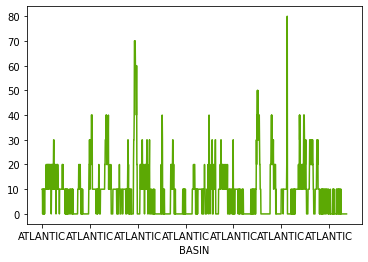

In [64]:
e_decks_trim.set_index(['BASIN']).xs('ATLANTIC')['30/24'].round(-1).plot()

##### Reliability for e-decks

In [65]:
pct_range = e_decks_trim['Prob. RI'].unique().tolist()
reliability_edecks = pd.DataFrame()
#
models_sel = ['RIOC','RIOD']
#i_model = 'RIOD'
#ipct = 50
for i_model in models_sel:
    i_e_decks_trim = e_decks_trim.set_index(['Tech']).xs(i_model).reset_index()
    for ipct in pct_range:
        if not ipct in i_e_decks_trim.set_index(['Prob. RI']).index:
            continue
        else:
            edeck_sel = i_e_decks_trim.set_index(['Prob. RI','BASIN','CYCLONE NO','DATE','TIME']).xs(ipct)
            bdeck_sel = best_track_diffs.reset_index().set_index(['BASIN','CYCLONE NO','DATE','TIME'])
            bdeck_sel['Y true'] = 0
            bdeck_sel['Y true'] = bdeck_sel['Y true'].mask(bdeck_sel['d24_VMAX']>= RI_thresh,1)
            b_ind = bdeck_sel.index.to_list()
            e_ind = edeck_sel.index.to_list()
            ind_both = set(b_ind)&set(e_ind)
            #
            bdeck_trim = bdeck_sel.loc[ind_both]
            edeck_trim = edeck_sel.loc[ind_both]
            total_days = edeck_trim.reset_index().groupby(['BASIN']).count()
            no_RI = bdeck_trim.groupby(['BASIN'])['Y true'].sum()
            # pct = 100*(no_RI/total_days)
            #
            i_df = pd.DataFrame(index=total_days.index,columns={'Observed Pct','Predicted Pct'})
            # 
            if len(no_RI) == 0:
                pct = 0
                i_df['Observed Pct'] = 0
                i_df['Observed No. RI'] = 0
            else:
                pct = 100*(no_RI/total_days['V'])
                i_df['Observed Pct'] = pct
                i_df['Observed No. RI'] = no_RI
            #
            i_df['Predicted Pct'] = ipct
            i_df['Observed No Total'] = total_days['V']
            i_df['Model'] = i_model
            reliability_edecks = reliability_edecks.append(i_df)
###

In [66]:
i_e_decks_trim.set_index(['BASIN']).xs('ATLANTIC')['Prob. RI'].unique()

array([10., 20., 30.,  5., 40., 70., 60., 80.])

In [67]:
reliability_edecks['Model'] = reliability_edecks['Model'].replace('RIOC','Consensus')
reliability_edecks['Model'] = reliability_edecks['Model'].replace('RIOD','SHIPS-RII')

In [68]:
edeck_sel = i_e_decks_trim.set_index(['Prob. RI','BASIN','CYCLONE NO','DATE','TIME'])#.xs(ipct)

In [69]:
#y_pred_res = y_pred_res.rename(columns={'Y test':'Y true'})
y_pred_res['Y pred probab (class: 1)'] = y_pred_res['Y pred probab (class: 1)']*100

In [70]:
y_pred_res['RI prob'] = (y_pred_res['Y pred probab (class: 1)']).round(-1)

In [71]:
y_pred_res['RI prob'] = y_pred_res['RI prob'].mask(y_pred_res['RI prob'] <= 5, 5)

In [72]:
#y_pred_res = y_pred_res.drop(columns={'BASIN','Unnamed: 0'})
# y_pred_res = y_pred_res[y_pred_res['Predicted Basin']!='ALL']

In [73]:
pct_range = y_pred_res['RI prob'].unique().tolist()
reliability = pd.DataFrame()
for ipct in pct_range:
    # ipct = 10
    if ipct == 100:
        continue
    y_sel = y_pred_res.set_index(['RI prob']).xs(ipct)
    total = y_sel.groupby(['Predicted Basin','Model']).count()
    RI = y_sel[y_sel['Y true']==1].groupby(['Predicted Basin','Model']).count()
    i_df = pd.DataFrame(index=total.index,columns={'Observed Pct','Predicted Pct'})
    if len(RI) == 0:
        pct = 0
        i_df['Observed Pct'] = 0
        i_df['Observed No. RI'] = 0
    else:
        pct = 100*(RI/total)
        i_df['Observed Pct'] = pct['CASE']
        i_df['Observed No. RI'] = RI['CASE']
    i_df['Predicted Pct'] = ipct
    i_df['Observed No Total'] = total['CASE']
    reliability = reliability.append(i_df)

In [74]:
reliability = reliability.mask(reliability.isna(),0)

In [75]:
reliability#.xs(('ALL','Random Forest')).sort_values(['Predicted Pct'])
palette = {'xkcd:crimson','xkcd:leaf green','xkcd:goldenrod','xkcd:sky blue'}#,'xkcd:olive'}
basin_ALL = reliability.reset_index()['Predicted Basin'].unique().tolist()
#foo = reliability.xs(('ALL'))
#foo2 = foo.xs(~'lbfgs').sort_values(['Predicted Pct'])
#foo = reliability.xs('ALL').reset_index()
#foo = foo[foo['Model']!='lbfgs']
#foo
reliability
# y_pred_res.set_index(['RI prob','Predicted Basin','Model']).xs((10,'ATLANTIC','Random Forest'))

Predicted Pct  Observed Pct  Observed No. RI  \
Predicted Basin Model                                                         
ALL             Random Forest           30.0     10.638298             10.0   
                lbfgs                   30.0     12.048193             10.0   
ATLANTIC        Random Forest           30.0     20.833333              5.0   
                lbfgs                   30.0      7.692308              2.0   
EAST_PACIFIC    Random Forest           30.0      0.000000              0.0   
...                                      ...           ...              ...   
ALL             lbfgs                   90.0     36.363636              8.0   
ATLANTIC        lbfgs                   90.0     25.000000              1.0   
EAST_PACIFIC    lbfgs                   90.0     25.000000              1.0   
SOUTH_PACIFIC   lbfgs                   90.0     25.000000              2.0   
WEST_PACIFIC    lbfgs                   90.0     66.666667              4.0   

                               Observed No Total  
Predicted Basin Model                             
ALL             Random Forest                 94  
                lbfgs                         83  
ATLANTIC        Random Forest                 24  
                lbfgs                         26  
EAST_PACIFIC    Random Forest                 11  
...                                          ...  
ALL             lbfgs                         22  
ATLANTIC        lbfgs                          4  
EAST_PACIFIC    lbfgs                          4  
SOUTH_PACIFIC   lbfgs                          8  
WEST_PACIFIC    lbfgs                          6  

[95 rows x 4 columns]

In [76]:
reliability_edecks = reliability_edecks.reset_index().rename(columns={'BASIN':'Predicted Basin'}).set_index(['Predicted Basin','Model'])
reliability_ALL = pd.concat([reliability,reliability_edecks])

In [77]:
RF_consensus = reliability_ALL.xs(('Random Forest'),level=1).reset_index().sort_values('Predicted Pct')
RF_consensus = RF_consensus[RF_consensus['Predicted Basin'].isin(['ATLANTIC','EAST_PACIFIC'])]
RF_consensus = RF_consensus.set_index(['Predicted Basin','Predicted Pct'])
RF_consensus.loc[('EAST_PACIFIC',5),:] = 0
RII_consensus = reliability_ALL.xs(('SHIPS-RII'),level=1).reset_index().set_index(['Predicted Basin','Predicted Pct'])
#RII_consensus.loc[('ATLANTIC',50),:] = 0
#RII_consensus.loc[('ATLANTIC',80),:] = 0
#RII_consensus.loc[('EAST_PACIFIC',70),:] = 0
RF_RII_consensus = pd.concat((RF_consensus.replace(0,np.nan),RII_consensus.replace(0,np.nan))).mean(level=(0,1))
RF_RII_consensus = RF_RII_consensus.reset_index().set_index(['Predicted Basin'])


In [78]:
RII_consensus.xs('ATLANTIC')
#RF_consensus.xs(('ATLANTIC',80))
#reliability_ALL.xs('EAST_PACIFIC').reset_index().set_index(['Predicted Pct','Model'])

,Observed Pct,Observed No. RI,Observed No Total
Predicted Pct,,,
10.0,3.529412,3.0,85
5.0,0.000000,0.0,82
20.0,12.500000,4.0,32
30.0,22.222222,2.0,9
40.0,33.333333,2.0,6
60.0,0.000000,0.0,3
70.0,100.000000,2.0,2


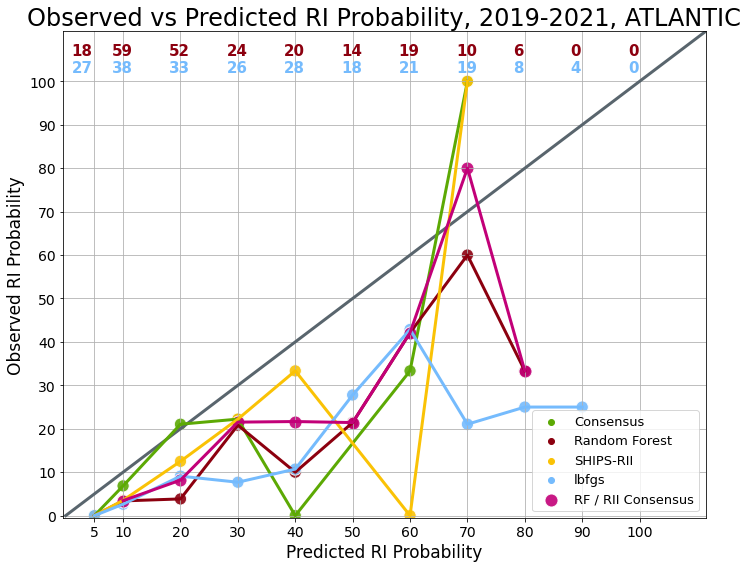

In [80]:
#for basin_sel in basin_ALL:
basin_sel = 'ATLANTIC'
fig1,ax1 = plt.subplots(1,1,figsize=(10,8))
#basin_sel = 'ALL'
ax1.plot([0,111.5],[0,111.5],linewidth=3,color='xkcd:slate grey')
sns.scatterplot(data=reliability_ALL.xs(basin_sel).reset_index().sort_values('Model'),x='Predicted Pct',y='Observed Pct',hue='Model',
                palette=sns.set_palette(palette),ax=ax1,s=150,alpha=0.9)
sns.lineplot(data=reliability_ALL.xs(basin_sel).reset_index().sort_values('Model'),x='Predicted Pct',y='Observed Pct',
            hue='Model',palette=sns.set_palette(palette),ax=ax1,linewidth=3,legend=False)
sns.scatterplot(data=RF_RII_consensus.xs(basin_sel),x='Predicted Pct',y='Observed Pct',color='xkcd:magenta',ax=ax1,
               s=170,alpha=0.9,label='RF / RII Consensus')
sns.lineplot(data=RF_RII_consensus.xs(basin_sel).reset_index(),x='Predicted Pct',y='Observed Pct',
             color='xkcd:magenta',ax=ax1,linewidth=3,legend=False)
#sns.scatterplot(data=foo,x='Predicted Pct',y='Observed Pct',hue='Model',
 #              palette=sns.set_palette(palette),ax=ax1,s=150,alpha=0.8)    
ax1.set_ylim([-0.5,111.5])
ax1.set_xlim([-0.5,111.5])
ax1.set_xticks(pct_range)
ax1.set_yticks(np.arange(0,101,10))
ax1.tick_params(axis='y',labelsize=14)
ax1.tick_params(axis='x',labelsize=14)
ax1.legend(fontsize=13,loc='lower right')
ax1.set_xlabel('Predicted RI Probability',fontsize=17)
ax1.set_ylabel('Observed RI Probability',fontsize=17)
plt_nums = reliability_ALL.xs(basin_sel).sort_values(['Predicted Pct']).reset_index().set_index(['Predicted Pct'])
ax1.grid()
# 
totals = reliability_ALL.xs(basin_sel).reset_index().sort_values('Predicted Pct').set_index(['Model','Predicted Pct'])
models_list = reliability_ALL.reset_index()['Model'].unique().tolist()
for i in ['Random Forest','lbfgs']:#,'saga']:
    mod_sel = totals.xs(i)
    for i_pct in pct_range:
        if i_pct in mod_sel.index:
            imod = mod_sel.xs(i_pct)['Observed No Total'].astype(int)
        else:
            imod = 0
        if i == 'Random Forest':
            yval = (101+5)
            i_color = sns.color_palette()[1]
        elif i == 'lbfgs':
            yval = (97+5)
            i_color = sns.color_palette()[3]
        elif i == 'saga':
            yval = (102+5 if i_pct < 90 else 91 -6)
            i_color = sns.color_palette()[2]
        #elif i == 'RIOC':
         #   yval = (97+5 if i_pct < 90 else 91 -6)
          #  i_color = sns.color_palette()[3]
        #elif i == 'RIOD':
         #   yval = (89+5 if i_pct < 90 else 91 -6)
          #  i_color = sns.color_palette()[4]
        #
        ax1.text((i_pct-4 if i_pct == 5 else i_pct -2),yval,imod,color=i_color,fontsize=15,weight='semibold')
ax1.set_title('Observed vs Predicted RI Probability, 2019-2021, {basin_sel}'.format(basin_sel=basin_sel),fontsize=24)
fig1.tight_layout()
fig1.savefig('Figures/reliability_ML_models_ALL_2019_2021_{basin_sel}.{fig_format}'.format(basin_sel=basin_sel,
                                                                                          fig_format=fig_format),
                format=fig_format,bbox_inches='tight',dpi=350)
#fig1.savefig('Figures/reliability_ML_models_2020_{basin_sel}.pdf'.format(basin_sel=basin_sel),
 #               format='pdf',bbox_inches='tight')

In [41]:
reliability_ALL.xs('ATLANTIC')

,Observed Pct,Predicted Pct,Observed No. RI,Observed No Total
Model,,,,
Random Forest,20.833333,30.0,5.0,24
lbfgs,7.692308,30.0,2.0,26
Random Forest,3.389831,10.0,2.0,59
lbfgs,2.631579,10.0,1.0,38
Random Forest,3.846154,20.0,2.0,52
lbfgs,9.090909,20.0,3.0,33
Random Forest,0.000000,5.0,0.0,18
lbfgs,0.000000,5.0,0.0,27
Random Forest,10.000000,40.0,2.0,20


In [42]:
reliability#_edecks
reliability_edecks = reliability_edecks.reset_index().rename(columns={'BASIN':'Predicted Basin'}).set_index(['Predicted Basin','Model'])

In [43]:
plt_nums = reliability.xs(('ALL')).sort_values(['Predicted Pct']).reset_index().set_index(['Predicted Pct','Model'])
plt_nums.index.get_level_values(0)

Float64Index([ 5.0,  5.0, 10.0, 10.0, 20.0, 20.0, 30.0, 30.0, 40.0, 40.0, 50.0,
              50.0, 60.0, 60.0, 70.0, 70.0, 80.0, 80.0, 90.0],
             dtype='float64', name='Predicted Pct')

In [44]:
models_list = plt_nums.reset_index()['Model'].unique()
reliability_ALL#.reset_index()['Model'].unique()

Observed Pct  Predicted Pct  Observed No. RI  \
Predicted Basin Model                                                         
ALL             Random Forest     10.638298           30.0             10.0   
                lbfgs             12.048193           30.0             10.0   
ATLANTIC        Random Forest     20.833333           30.0              5.0   
                lbfgs              7.692308           30.0              2.0   
EAST_PACIFIC    Random Forest      0.000000           30.0              0.0   
...                                     ...            ...              ...   
                SHIPS-RII        100.000000           50.0              2.0   
ATLANTIC        SHIPS-RII          0.000000           60.0              0.0   
EAST_PACIFIC    SHIPS-RII        100.000000           60.0              1.0   
ATLANTIC        SHIPS-RII        100.000000           70.0              2.0   
EAST_PACIFIC    SHIPS-RII        100.000000           90.0              1.0   

                               Observed No Total  
Predicted Basin Model                             
ALL             Random Forest                 94  
                lbfgs                         83  
ATLANTIC        Random Forest                 24  
                lbfgs                         26  
EAST_PACIFIC    Random Forest                 11  
...                                          ...  
                SHIPS-RII                      2  
ATLANTIC        SHIPS-RII                      3  
EAST_PACIFIC    SHIPS-RII                      1  
ATLANTIC        SHIPS-RII                      2  
EAST_PACIFIC    SHIPS-RII                      1  

[124 rows x 4 columns]

In [45]:
RF_consensus = reliability_ALL.xs(('Random Forest'),level=1).reset_index().sort_values('Predicted Pct')
RF_consensus = RF_consensus[RF_consensus['Predicted Basin'].isin(['ATLANTIC','EAST_PACIFIC'])]
RF_consensus = RF_consensus.set_index(['Predicted Basin','Predicted Pct'])
RF_consensus.loc[('EAST_PACIFIC',5),:] = 0
RII_consensus = reliability_ALL.xs(('SHIPS-RII'),level=1).reset_index().set_index(['Predicted Basin','Predicted Pct'])
RII_consensus.loc[('ATLANTIC',50),:] = 0
RII_consensus.loc[('ATLANTIC',80),:] = 0
RII_consensus.loc[('EAST_PACIFIC',70),:] = 0
RF_RII_consensus = (RF_consensus + RII_consensus)/2


In [46]:
reliability_ALL.xs(('Random Forest'),level=1).reset_index().sort_values('Predicted Pct')
#RII_consensus
RF_RII_consensus
#RF_consensus
#RII_consensus

Observed Pct  Observed No. RI  \
Predicted Basin Predicted Pct                                  
ATLANTIC        5.0                0.000000              0.0   
                10.0               3.459621              2.5   
                20.0               8.173077              3.0   
                30.0              21.527778              3.5   
                40.0              21.666667              2.0   
                50.0              10.714286              1.5   
                60.0              21.052632              4.0   
                70.0              80.000000              4.0   
                80.0              16.666667              1.0   
EAST_PACIFIC    5.0                0.000000              0.0   
                10.0               0.000000              0.0   
                20.0               4.000000              1.0   
                30.0               3.333333              0.5   
                40.0              51.515152              5.0   
                50.0              57.500000              2.5   
                60.0              77.777778              5.5   
                70.0              26.923077              3.5   
                80.0                    NaN              NaN   
                90.0                    NaN              NaN   

                               Observed No Total  
Predicted Basin Predicted Pct                     
ATLANTIC        5.0                         50.0  
                10.0                        72.0  
                20.0                        42.0  
                30.0                        16.5  
                40.0                        13.0  
                50.0                         7.0  
                60.0                        11.0  
                70.0                         6.0  
                80.0                         3.0  
EAST_PACIFIC    5.0                         17.5  
                10.0                        17.0  
                20.0                        16.5  
                30.0                        13.0  
                40.0                        10.0  
                50.0                        11.0  
                60.0                         9.5  
                70.0                         6.5  
                80.0                         NaN  
                90.0                         NaN